In [1]:
# Import all necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics


import warnings
warnings.filterwarnings("ignore")

## TASK 1: Data Exploration and Preprocessing

In [2]:
# Load the Dataset
cyclist_df = pd.read_csv(r"/Users/payalchavan/Documents/Data Mining_Assignments/Assignment 3/Fremont_Bridge_Bicycle_Counter_20240318.csv")
cyclist_df.head()

,Date,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
0,10/02/2012 01:00:00 PM,55.0,7.0,48.0
1,10/02/2012 02:00:00 PM,130.0,55.0,75.0
2,10/02/2012 03:00:00 PM,152.0,81.0,71.0
3,10/02/2012 04:00:00 PM,278.0,167.0,111.0
4,10/02/2012 05:00:00 PM,563.0,393.0,170.0


In [3]:
# Take a look at the data structure
cyclist_df.shape

(98579, 4)

In [4]:
cyclist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98579 entries, 0 to 98578
Data columns (total 4 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Date                                                                98579 non-null  object 
 1   Fremont Bridge Sidewalks, south of N 34th St                        98552 non-null  float64
 2   Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk  98552 non-null  float64
 3   Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk  98552 non-null  float64
dtypes: float64(3), object(1)
memory usage: 3.0+ MB


In [5]:
cyclist_df.rename(columns={'Fremont Bridge Sidewalks, south of N 34th St': 'Fremont Bridge Total', 
                           'Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk': 'West Sidewalk',
                           'Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk': 'East Sidewalk'},
                  inplace=True)

In [6]:
cyclist_df.head()

,Date,Fremont Bridge Total,West Sidewalk,East Sidewalk
0,10/02/2012 01:00:00 PM,55.0,7.0,48.0
1,10/02/2012 02:00:00 PM,130.0,55.0,75.0
2,10/02/2012 03:00:00 PM,152.0,81.0,71.0
3,10/02/2012 04:00:00 PM,278.0,167.0,111.0
4,10/02/2012 05:00:00 PM,563.0,393.0,170.0


In [7]:
# Summary Statistics
cyclist_df.describe()

,Fremont Bridge Total,West Sidewalk,East Sidewalk
count,98552.000000,98552.000000,98552.000000
mean,106.024667,45.973973,60.050694
std,132.548694,60.519212,81.957561
min,0.000000,0.000000,0.000000
25%,13.000000,5.000000,7.000000
50%,59.000000,26.000000,32.000000
75%,144.000000,63.000000,79.000000
max,1097.000000,667.000000,850.000000


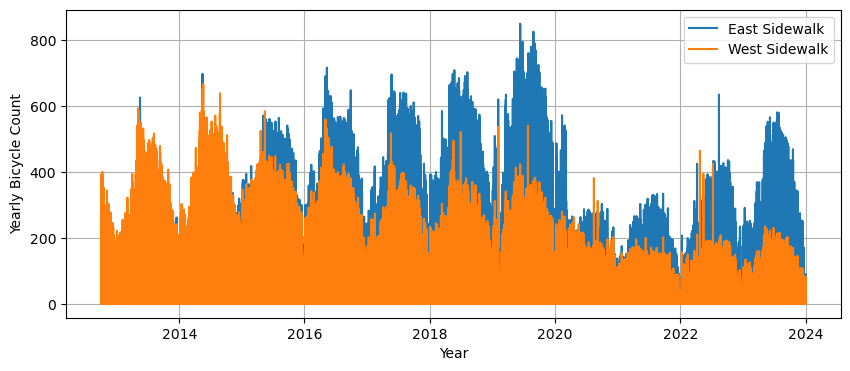

In [9]:
# Create a line chart to find the bicycle counts for both 'east' and 'west' sidewalks
cyclist_df["Date"] = pd.to_datetime(cyclist_df["Date"])

plt.figure(figsize=(10, 4))
plt.plot(cyclist_df["Date"], cyclist_df["East Sidewalk"], label="East Sidewalk")
plt.plot(cyclist_df["Date"], cyclist_df["West Sidewalk"], label="West Sidewalk")

# Customize the plot
plt.grid()
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("Yearly Bicycle Count")
plt.show()

Insights: From 2014 to 2024, the plot shows the annual bicycle counts on the East Sidewalk (shown in blue) and the West Sidewalk (shown in orange). Bicycle traffic on both sidewalks has fluctuated over time. In general, more people use the East Sidewalk than the West Sidewalk. There are discernible seasonal peaks and troughs on both sidewalks. Bicycle counts for both sidewalks significantly decline about 2020, perhaps as a result of external factors like the COVID-19 pandemic. Bicycle traffic on the East Sidewalk is consistently higher, a reflection of its vibrant urban lifestyle. The West Sidewalk has fewer counts but is constant. There are more bicycles on the East Sidewalk on a regular basis, which suggests that it is more popular or connected. There are less users of the West Sidewalk, although it is still in use.

In [10]:
# Checking for missing values in the dataset
cyclist_df.isnull().sum()

Date                     0
Fremont Bridge Total    27
West Sidewalk           27
East Sidewalk           27
dtype: int64

In [11]:
# Checking for duplicate records in the dataset
cyclist_df.duplicated().any()

False

In [12]:
# Impute missing values using forward fill method
cyclist_df.ffill(inplace=True)

# Check again for missing values to confirm imputation
cyclist_df.isnull().sum()

Date                    0
Fremont Bridge Total    0
West Sidewalk           0
East Sidewalk           0
dtype: int64

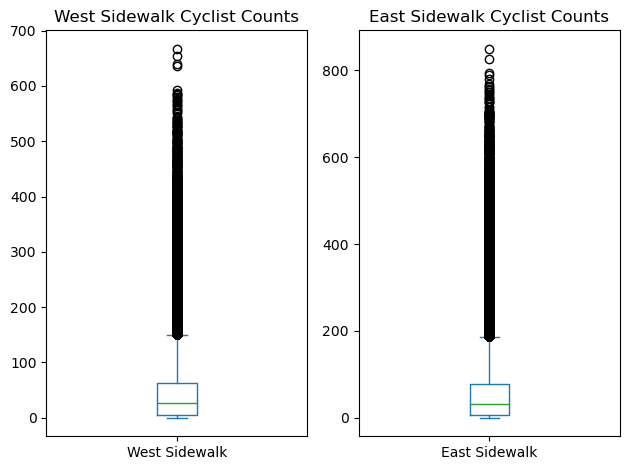

In [13]:
# Set the background color to white for visibility
plt.figure(facecolor='white')

# Plot boxplots for cyclist counts on each sidewalk
plt.subplot(1, 2, 1)
cyclist_df['West Sidewalk'].plot(kind='box', title='West Sidewalk Cyclist Counts')
plt.subplot(1, 2, 2)
cyclist_df['East Sidewalk'].plot(kind='box', title='East Sidewalk Cyclist Counts')

plt.tight_layout()
plt.show()

Insights: The box plots represents the counts of cyclists on the east and west walkways of the Fremont Bridge exhibit the existence of outliers, denoted by the points that extend beyond the plots' whiskers. These outliers show hours when the number of cyclists was abnormally high or low in relation to the dataset's typical range.

In [14]:
# Checking for outliers using the Z-score method
from scipy import stats
z_scores = stats.zscore(cyclist_df.select_dtypes(include=[np.number]))

In [15]:
# The threshold for an outlier is usually a Z-score of 3 or -3, i.e., data points that are 3 standard deviations away from the mean
cyclist_df = cyclist_df[(z_scores < 3).all(axis=1)]
cyclist_df.shape

(94389, 4)

## TASK 2: Feature Engineering 

In [16]:
# Convert the 'Date' column to datetime format
cyclist_df['Date'] = pd.to_datetime(cyclist_df['Date'])

# Extract year, month, day, hour, and day of week from 'Date' column
cyclist_df['Year'] = cyclist_df['Date'].dt.year
cyclist_df['Month'] = cyclist_df['Date'].dt.month
cyclist_df['Day'] = cyclist_df['Date'].dt.day
cyclist_df['Hour'] = cyclist_df['Date'].dt.hour
cyclist_df['DayOfWeek'] = cyclist_df['Date'].dt.dayofweek

# Create a 'Weekend' column, where 1 indicates a weekend and 0 indicates a weekday
cyclist_df['Weekend'] = cyclist_df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

# Create 'RushHour' column, where 1 indicates rush hour (7-9 AM and 4-6 PM) and 0 indicates non-rush hour
cyclist_df['RushHour'] = cyclist_df['Hour'].apply(lambda x: 1 if (x >= 7 and x <= 9) or (x >= 16 and x <= 18) else 0)

# Display the first few rows of the dataframe to verify the changes
cyclist_df.head()

,Date,Fremont Bridge Total,West Sidewalk,East Sidewalk,Year,Month,Day,Hour,DayOfWeek,Weekend,RushHour
0,2012-10-02 13:00:00,55.0,7.0,48.0,2012,10,2,13,1,0,0
1,2012-10-02 14:00:00,130.0,55.0,75.0,2012,10,2,14,1,0,0
2,2012-10-02 15:00:00,152.0,81.0,71.0,2012,10,2,15,1,0,0
3,2012-10-02 16:00:00,278.0,167.0,111.0,2012,10,2,16,1,0,1
6,2012-10-02 19:00:00,175.0,104.0,71.0,2012,10,2,19,1,0,0


Insights: We've successfully created new features from the 'Date' column, extracting the hour of the day (Hour) and the day of the week (DayOfWeek). These features will help us understand how bicycle counts vary by time of day and across different days of the week.
To enhance the predictive power of our models, we'll identify and create new features that could influence bicycle counts on the Fremont Bridge. Potential predictor variables include: 
1. Weekend: This feature is created to identify if more number of cyclists are riding on a weekend.
2. RushHour: This feature soughts to obtain the rush hour from the maximum no. of cyclists riding in the given hour.
3. DayOfWeek: This feature can be used to predict on which day of the week the cyclist count is highest.


In [31]:
# Plot a line chart to show the variation of total cyclist count in years

yearly_total_cyclists = cyclist_df.groupby('Year')['Fremont Bridge Total'].sum().reset_index()

# Create an interactive line plot using Plotly Express
fig = px.line(yearly_total_cyclists, x='Year', y='Fremont Bridge Total', title='Yearly Total Cyclist Counts')
fig.update_layout(xaxis_title='Year', yaxis_title='Total Cyclist Count')

#Show the plot
fig.show()

Insights: The following key observations can be made from the abvove line plot-
2012: There are fewer than 200,000 bicycles in the world.
Between 2014 and 2016, the number of bicycles increased dramatically, approaching 800,000.
2018–2020: There is a minor drop in the counts.
2022: The upward trend resumes.

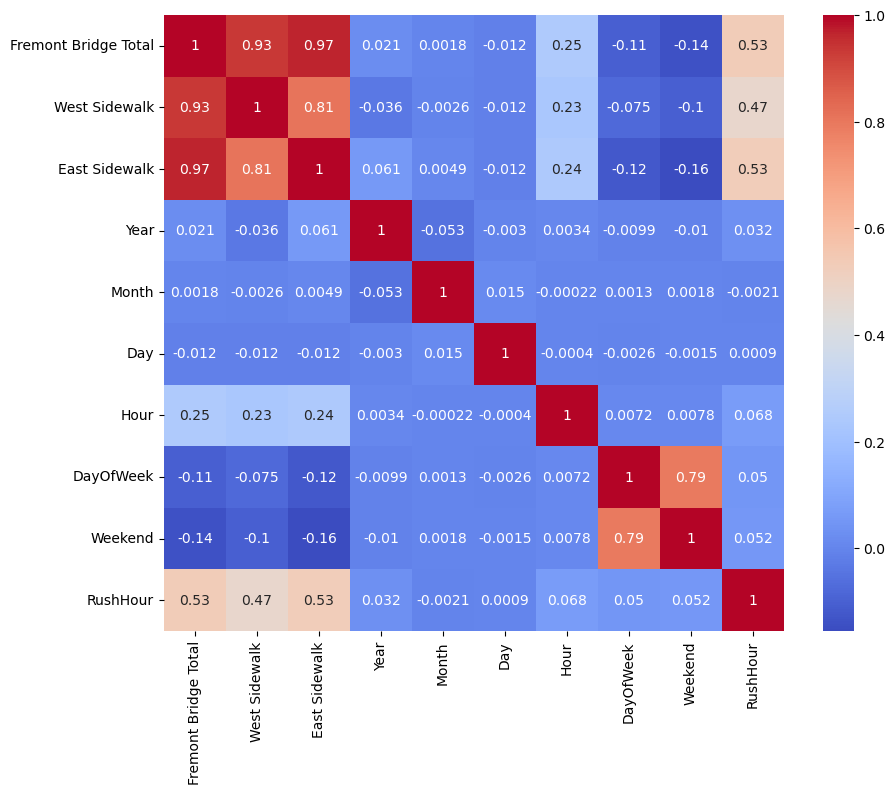

In [17]:
#Correlation matrix
#Exclude non-numerical columns from the correlation matrix calculation
numeric_columns = cyclist_df.select_dtypes(include=[np.number]).columns
corr_matrix = cyclist_df[numeric_columns].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Insights: The heatmap above illustrates how different parameters are correlated. This suggests that "Fremont Bridge Total" "West Sidewalk," and "East Sidewalk" have a strong correlation. The "RushHour" Factor also has a tendency to have a slight correlation with the three elements mentioned above. Furthermore, we can observe that there is only a modest association between the variables "DayOfWeek," "Weekend," "Hour," and "Day" and the "Fremont Bridge Total" "West Sidewalk," and "East Sidewalk."

## TASK 3: Linear Regression

In [18]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting 'Hour' as the predictor and 'Fremont Bridge Total' as the target variable
X = cyclist_df[['Hour']]  # Feature
y = cyclist_df['Fremont Bridge Total']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print the metrics
mse = mean_squared_error(y_test, y_pred)
# RMSE
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Displaying the model's coefficients
coefficient = model.coef_[0]
intercept = model.intercept_

print("Model Coefficient:", coefficient)
print("Model Intercept:", intercept)

print(f"Linear Regression - Mean Squared Error (MSE): {mse}")
print(f"Linear Regression - Root Mean Squared Error (RMSE): {rmse}")
print(f"Linear Regression - R-squared: {r2}")

Model Coefficient: 3.3575720239166
Model Intercept: 48.27691805676808
Linear Regression - Mean Squared Error (MSE): 8266.301617108744
Linear Regression - Root Mean Squared Error (RMSE): 90.91920378615698
Linear Regression - R-squared: 0.05999591397638038


Insights: The linear regression model, using 'Hour' as the predictor for the total number of cyclists passing through the Fremont Bridge, has been successfully built. Here are the key findings:

1. Model Coefficient: The coefficient of 3.35 indicates that, there is an hourly average increase in bicycles throughout the day of about three per hour.
2. Model Intercept: At hour zero (midnight), the intercept of 48.27 represents the anticipated number of bikers.
3. MSE (Mean Squared Error): The MSE value is 8266, which reflects how concentrated the data is around the line of best fit.
4. RMSE (Root Mean Squared Error): The RMSE value of 90.91 indicates the standard deviation of the residuals (prediction errors). This value shows how concentrated the data is around the line of best fit.
5. R-squared: With an R-squared of 0.059, the hour of the day only accounts for 5.9% of the variation in the overall number of bikers. This suggests that there is only a slight linear relationship between the overall number of bikers and the hour of the day.

These findings imply that although the number of cyclists riding over the Fremont Bridge increases slightly during the day, the number of cyclists riding across the bridge does not closely correlate with the time of day. Cyclist numbers may be significantly impacted by other variables that are not taken into account in this model.

## TASK 4: Multiple Regression

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the features and target for multiple regression
X_multi = cyclist_df[['Hour', 'Weekend', 'RushHour']]  # Features
y_multi = cyclist_df['Fremont Bridge Total']  # Target

# Checking for multicollinearity
vif_data = pd.DataFrame()
vif_data['feature'] = X_multi.columns
vif_data['VIF'] = [variance_inflation_factor(X_multi.values, i) for i in range(len(X_multi.columns))]


# Split the data into training and testing sets for multiple regression
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Create a multiple regression model
model_multi = LinearRegression()

# Train the multiple regression model
model_multi.fit(X_train_multi, y_train_multi)

# Make predictions with the multiple regression model
y_pred_multi = model_multi.predict(X_test_multi)

# Calculate and print the metrics for the multiple regression model
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

# RMSE and R-squared for multiple regression model
# Calculate RMSE for multiple regression model
rmse_multi = np.sqrt(mse_multi)


# Displaying the model's coefficients
coefficients = model.coef_
intercept = model.intercept_

print("VIF Data: \n", vif_data)
print("Model Coefficients:", coefficients)
print("Model Intercept:", intercept)


# Print RMSE and R-squared for multiple regression model
print(f"Multiple Regression - Mean Squared Error (MSE): {mse_multi}")
print(f"Multiple Regression - Root Mean Squared Error (RMSE): {rmse_multi}")
print(f"Multiple Regression - R-squared: {r2_multi}")

VIF Data: 
     feature       VIF
0      Hour  1.455019
1   Weekend  1.299372
2  RushHour  1.241619
Model Coefficients: [3.35757202]
Model Intercept: 48.27691805676808
Multiple Regression - Mean Squared Error (MSE): 5614.910580992549
Multiple Regression - Root Mean Squared Error (RMSE): 74.93270701764716
Multiple Regression - R-squared: 0.3614993580845989


Insights: The multiple regression model was developed using 'Hour', 'Weekend', and 'Rushhour' as predictor variables. 

VIF Data: Multicollinearity between predictor variables is evaluated using the Variance Inflation Factor (VIF). The VIF values in this model are roughly 1.45, 1.30, and 1.24 for features like "Hour," "Weekend," and "Rushhour," in that order. The minimum multicollinearity indicated by these low VIF values suggests that the dependability of the coefficients of these predictors can be maintained when being used in combination.

Model Coefficients: For “Hour”: An increase of one hour is associated with approximately 3.35 more cyclists (holding other variables constant).

Model Intercept: The intercept is 48.27, indicating the expected number of cyclists at hour 0 (midnight) on the reference day of the week.

RMSE (Root Mean Squared Error): The RMSE value of 74.93 indicates the standard deviation of the residuals (prediction errors), showing how concentrated the data is around the line of best fit.

R-squared: With an R-squared of 0.36, the model appears to account for roughly 3.6% of the variance in the overall number of cyclists. This suggests that other factors not included in the model may have a major impact on the overall number of cyclists, as there is only a weak linear relationship between the predictor variables and the total number of cyclists.

To summarize, the model's predictive potential is limited, as evidenced by the low R-squared value, even though it offers some insights into how the variables "Hour," "Weekend," and "Rushhour" affect the number of cyclists. This shows that there is a need to investigate other variables that can enhance the functionality of the model.

## TASK 5: Model Diagnostics

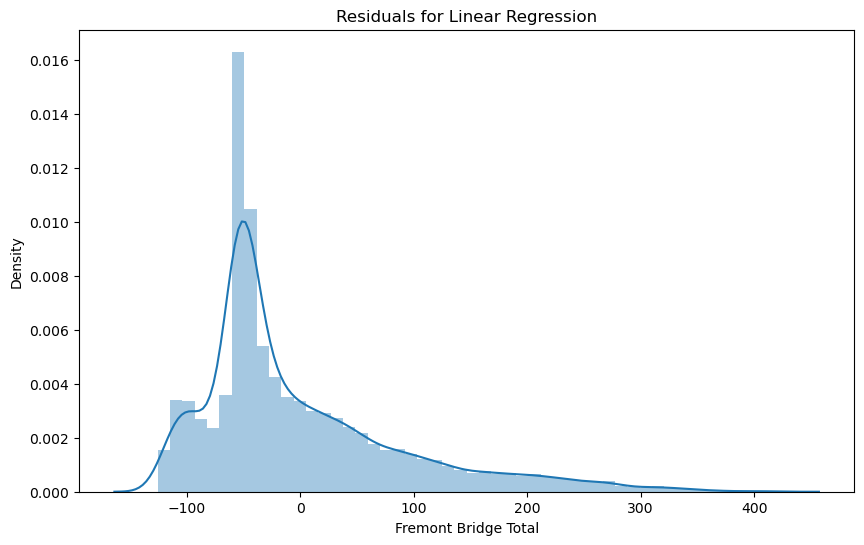

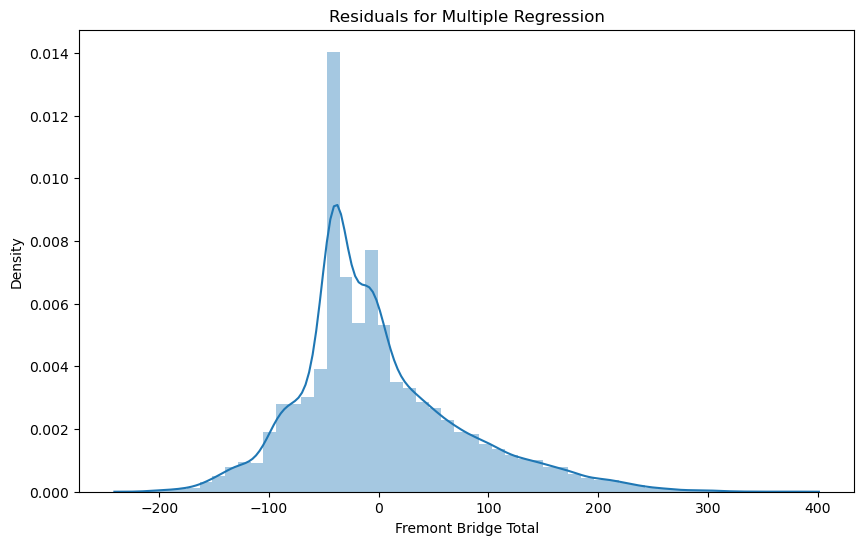

P-value for normality of residuals (Linear Regression): 0.0
P-value for normality of residuals (Multiple Regression): 0.0
Mean Absolute Error (Linear Regression): 69.66069037366206
Mean Absolute Error (Multiple Regression): 56.94664745942188
Median Absolute Error (Linear Regression): 53.71707360839952
Median Absolute Error (Multiple Regression): 42.815571799159194


In [20]:
# Import necessary libraries
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn import metrics

# Calculate residuals for linear regression
residuals = y_test - y_pred

# Calculate residuals for multiple regression
residuals_multi = y_test_multi - y_pred_multi

# Plot residuals for linear regression
plt.figure(figsize=(10, 6))
sns.distplot(residuals)
plt.title('Residuals for Linear Regression')
plt.show()

# Plot residuals for multiple regression
plt.figure(figsize=(10, 6))
sns.distplot(residuals_multi)
plt.title('Residuals for Multiple Regression')
plt.show()

# Perform a normality test on the residuals
_, p_value = stats.normaltest(residuals)
print(f"P-value for normality of residuals (Linear Regression): {p_value}")

_, p_value_multi = stats.normaltest(residuals_multi)
print(f"P-value for normality of residuals (Multiple Regression): {p_value_multi}")

# Calculate the Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, y_pred)
mae_multi = metrics.mean_absolute_error(y_test_multi, y_pred_multi)
print(f"Mean Absolute Error (Linear Regression): {mae}")
print(f"Mean Absolute Error (Multiple Regression): {mae_multi}")


# Calculate the Median Absolute Error (MedAE)
medae = metrics.median_absolute_error(y_test, y_pred)
medae_multi = metrics.median_absolute_error(y_test_multi, y_pred_multi)
print(f"Median Absolute Error (Linear Regression): {medae}")
print(f"Median Absolute Error (Multiple Regression): {medae_multi}")

Insights: The first plot shows the residuals for the Fremont Bridge Total in a linear regression model. The residuals distribution is depicted in the blue area graph. As would be predicted for a well-fitting model, the majority of residuals are spread around zero. There is a discernible peak at zero residual, though, suggesting that either repeated measures were used or that the model accurately predicted a large number of observations. The remaining residuals seem to have a large tail that points in the direction of positive values and a reasonably normal distribution overall.

The second plot displays the residuals for a multiple regression model related to the Fremont Bridge Total. This plot also is highly distributed around zero. However, there is a noticeable spike at zero residual. It might be due to specific patterns in the data or model assumptions not being met. 

From the above metrics, we can draw the following conclusions:
1. P-value for normality of residuals (Linear Regression): A statistical metric known as the P-value is used to assess whether the residuals in a linear regression model—that is, the variations between the actual and projected values—follow a normal distribution. It is suggested that the residuals are not normally distributed by a low P-value (such as 0.0).
2. P-value for normality of residuals (Multiple Regression): This P-value (also 0.0), which evaluates the normality of residuals in a multiple regression model, is comparable to that of linear regression.
3. Mean Absolute Error (MAE) (Linear Regression): The average absolute difference between the actual and projected values in the linear regression model is represented by this value, roughly 69.66. It displays the accuracy performance of the model.
4. Mean Absolute Error (MAE) (Multiple Regression): The MAE for the multiple regression model is roughly 56.95. The average absolute error between the actual and expected numbers is reflected in it.
5. Median Absolute Error (MedAE) (Linear Regression): The actual and anticipated values' median absolute difference is represented by this value, which is roughly 53.71. It offers an additional gauge of model accuracy, particularly in the context of handling outliers.
6. Median Absolute Error (MedAE) (Multiple Regression): For multiple regression, the MedAE is roughly 42.82. Similar to linear regression, it offers a reliable accuracy metric.

Interpretation:
A lower P-values suggest that the residuals deviate from a normal distribution, which could have an effect on how reliable the regression models are.
The multiple regression model appears to perform better than the linear regression model when comparing the MAE and MedAE values since it has smaller average errors.

In [26]:
X_multi = cyclist_df[['Hour', 'Weekend', 'RushHour']]   
y_multi = cyclist_df['Fremont Bridge Total']  

scaler = StandardScaler()
X_multi_scaled = scaler.fit_transform(X_multi)

# Splitting the data into training and testing sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi_scaled, y_multi, test_size=0.2, random_state=42)

# Adding a constant term to the predictor variables 
X_train_multi_const = sm.add_constant(X_train_multi)
X_test_multi_const = sm.add_constant(X_test_multi)

# Fit the multiple regression model using statsmodels on the training data
multi_reg = sm.OLS(y_train_multi, X_train_multi_const).fit()

# The summary of the Multiple regression model
print(multi_reg.summary())

                             OLS Regression Results                             
Dep. Variable:     Fremont Bridge Total   R-squared:                       0.356
Model:                              OLS   Adj. R-squared:                  0.356
Method:                   Least Squares   F-statistic:                 1.392e+04
Date:                  Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                          20:31:28   Log-Likelihood:            -4.3328e+05
No. Observations:                 75511   AIC:                         8.666e+05
Df Residuals:                     75507   BIC:                         8.666e+05
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.7469      0.273

OLS (Ordinary Least Squares) regression analysis:
The "Fremont Bridge Total" is the name of the dependent variable in this analysis. The residuals are examined for autocorrelation using the Durbin-Watson statistic. The distribution's shape is described by the values of skewness and kurtosis. How effectively the independent variables explain the variation in the dependent variable is indicated by the coefficient of determination, or R-squared. It's roughly 0.356 in this instance, indicating a decent fit. R-squared with an adjustment for the number of predictors is called adjusted R-squared. An indicator of overall model fit is the F-statistic. Prob (F-statistic): The F-statistic's corresponding p-value.

R-squared:
According to the R-squared value, the model only captures a small portion of the variation in the number of bicycles on each bridge—roughly 3.5%. It implies that the model's predictors might not adequately account for the variation in bicycle usage on the related Fremont Bridge.

The coefficients represent the estimated effect of each predictor variable on bicycle counts, holding other variables constant.The corresponding mapping is as follows:
const (intercept): 86.7469
x1 (Hour): 20.2741
x2 (DayOfWeek): -15.7429
x3 (RushHour): 49.1842 

From the above values it can be found that:

1)Hour has a positive impact (20.2741) on cyclist counts. As the hour increases, cyclist counts tend to increase.

2)DayOfWeek has a negative impact (-15.7429) on cyclist counts. This suggests that weekdays tend to have lower bicycle usage compared to weekends.

3)RushHour(49.1842) have relatively higher coefficients and may have significant impacts on cyclist counts compared to Hour and DayOfWeek.

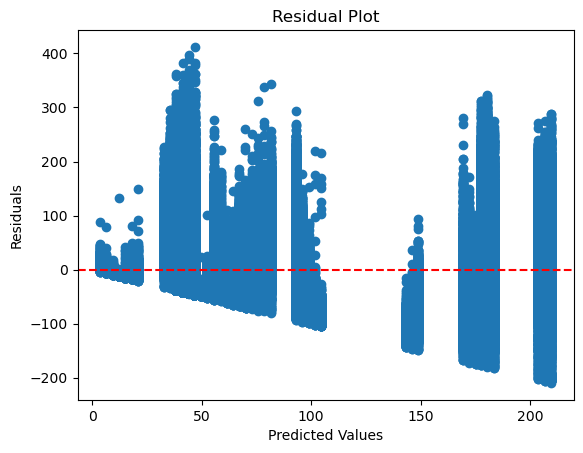

In [27]:
residuals = y_train_multi - multi_reg.predict(X_train_multi_const)

plt.scatter(multi_reg.predict(X_train_multi_const), residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


At particular predicted values, we observe residual clusters. These clusters show that not all levels of anticipated values are spread uniformly in the model's predictions. The residual pattern points to the possibility of some non-linearity in the response variable's relationship to the predictor factors. If the model's predictions were flawless, the residuals would be located at the red dashed line at 0. Deviations from this line represent flaws in the model. Residues that group together around specific projected values suggest that the model is consistently over- or underestimating particular data points.

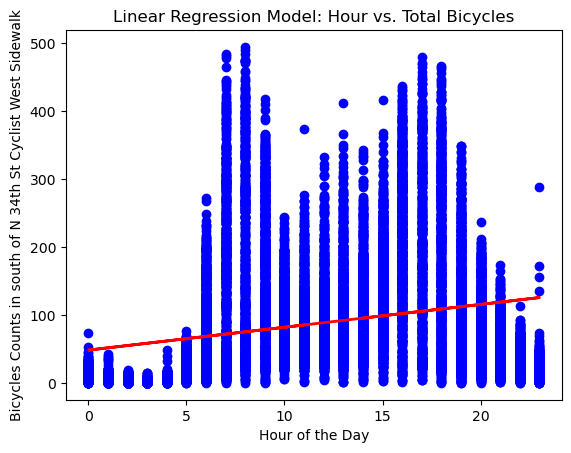

In [25]:
# Plot the regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Hour of the Day')
plt.ylabel('Cyclist Counts')
plt.title('Linear Regression Model: Hour vs. Total Bicycles')
plt.show()

A linear regression model of the total number of bicycles counted vs the hour of the day is displayed in the plot.
The dispersed data points suggest a considerable fluctuation in the number of bicycles at various hours.
On the other hand, as the day goes on, the red linear regression line indicates a general increase in the number of bicycles. Residues that group together around specific projected values suggest that the model is consistently over- or underestimating particular data points.
Enhancing the model can be achieved by looking into the origin of these clusters. 
1. Taking into account non-linear transformations of predictor variables is one possible course of action.
2. Adding interaction terms.
3. Looking for significant data points or outliers.

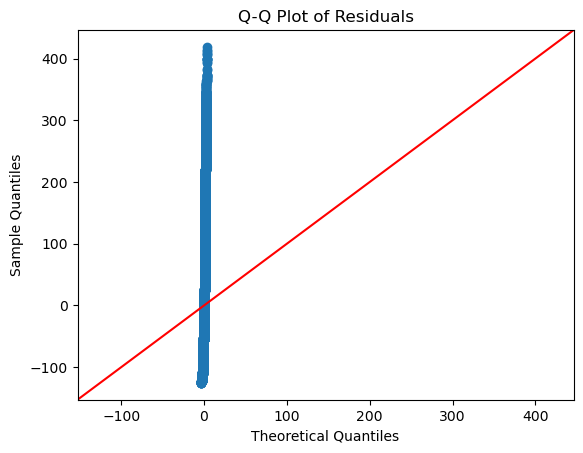

In [22]:
import statsmodels.api as sm 
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

The provided plot, a Q-Q plot, is used to assess whether the data adheres to a specific distribution, most frequently a normal distribution.
The following are some important observations:

Dispersed Points of Data: The sample quantiles (observed residuals) are represented by the blue dots.

Theoretical Quantiles Line: A normal distribution's theoretical quantiles are shown by the red line.

Disturbance from the norm: The residuals are not regularly distributed, as shown by the blue dots' imperfect alignment with the red line.

In [28]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson


# Heteroscedasticity Detection (Breusch-Pagan test)
homo_test = het_breuschpagan(residuals, X_train_multi_const)
print(f"Homoscedasticity Breusch-Pagan Test p-value: {homo_test[1]}")

# Autocorrelation test (Durbin-Watson test)
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_stat}")

Homoscedasticity Breusch-Pagan Test p-value: 0.0
Durbin-Watson Statistic: 2.005024934220488


Insights: 
Breusch-Pagan Test, homoscedasticity:
The Breusch-Pagan test produced a p-value of 0, which is incredibly low and provides strong evidence against the homoscedasticity null hypothesis. This demonstrates that heteroscedasticity is present, which indicates that there is inconsistent variability in bicycle counts across the predictor variable levels (Hour, Weekend, RushHour).

Durbin-Watson autocorrelation statistic:
The value of the Durbin-Watson statistic, 2.005024934220488, is in close proximity to 2, indicating the absence of considerable autocorrelation in the residuals. This suggests that there is no regular pattern in the residuals over time or between observations, and that they are independent.